<a href="https://colab.research.google.com/github/bodorcy/hazifeladatok/blob/main/ml_3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Osztályozási feladat

Olvasd el az [előadás olvasóleckét](http://inf.u-szeged.hu/~rfarkas/ML20/osztalyozas.html)!


## Adatelőkészítés
Ebben a leckében az [UCI Credit Approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) adatbázist fogjuk használni és azt akarjuk osztályozni, hogy egy hitelkártya igénylés teljesíthető (`class=+`) vagy elutasítandó (`class=-`).

In [18]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ashishktripathi/Credit-Card-Approval/refs/heads/master/CC_data.csv', na_values=['?'])
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [19]:
classlabel = df["Approved"] # osztálycímke (célváltozó), amit előre akarunk jelezni
features = df.iloc[:,:-1] # az utolsó oszlop kivételével minden oszlop jellemző (ezek alapján történik az előrejelzés)
# a features a tanító adatbázis egyedeinek jellemzőreprezentációja, ami ugyanolyan hosszú, mint a címkevektor (célváltozó)

In [20]:
df.Age

,Age
0,30.83
1,58.67
2,24.50
3,27.83
4,20.17
...,...
685,21.08
686,22.67
687,25.25
688,17.92


In [21]:
classlabel.value_counts()

,count
Approved,
-,383
+,307


In [22]:
classlabel.value_counts()['-'] / len(classlabel)

np.float64(0.5550724637681159)

In [25]:
# Példányosítsunk egy osztályozót
from sklearn import tree
dt = tree.DecisionTreeClassifier() # döntési fa osztályozó

In [24]:
# egy osztályozó tanítása a fit() függvénnyel a jellemzővektorok és osztálycímkék (célváltozó) alapján
dt.fit(features, classlabel)

ValueError: could not convert string to float: 'b'

## Előfeldolgozás

Ez így sajnos nem jó, mert a kategórikus jellemzőket nem tudja defaultból kezelni az sklearn :(

Csak folytonos változókat képes... Át kell kódolnunk, használjuk a one hot encodingot!

In [26]:
ohe_features = pd.get_dummies(features)
ohe_features

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Male_a,Male_b,Married_l,Married_u,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,202.0,0,False,True,False,True,...,False,False,True,False,True,True,False,True,False,False
1,58.67,4.460,3.04,6,43.0,560,True,False,False,True,...,False,False,True,False,True,True,False,True,False,False
2,24.50,0.500,1.50,0,280.0,824,True,False,False,True,...,False,False,True,True,False,True,False,True,False,False
3,27.83,1.540,3.75,5,100.0,3,False,True,False,True,...,False,False,True,False,True,False,True,True,False,False
4,20.17,5.625,1.71,0,120.0,0,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,False,True,False,False,...,False,True,False,True,False,True,False,True,False,False
686,22.67,0.750,2.00,2,200.0,394,True,False,False,True,...,False,True,False,False,True,False,True,True,False,False
687,25.25,13.500,2.00,1,200.0,1,True,False,False,False,...,False,True,False,False,True,False,True,True,False,False
688,17.92,0.205,0.04,0,280.0,750,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False


## Döntési fa osztályozó
[Döntési fa osztályozót](http://inf.u-szeged.hu/~rfarkas/ML20/dontesi_fa.html) fogunk használni, ami jó választás kevés számú diszkrét jellemző esetén.

In [28]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(ohe_features, classlabel)
# a dt a model, a betanított rendszer ami képes korábban nem látott egyedekre is predikálni

DecisionTreeClassifier()

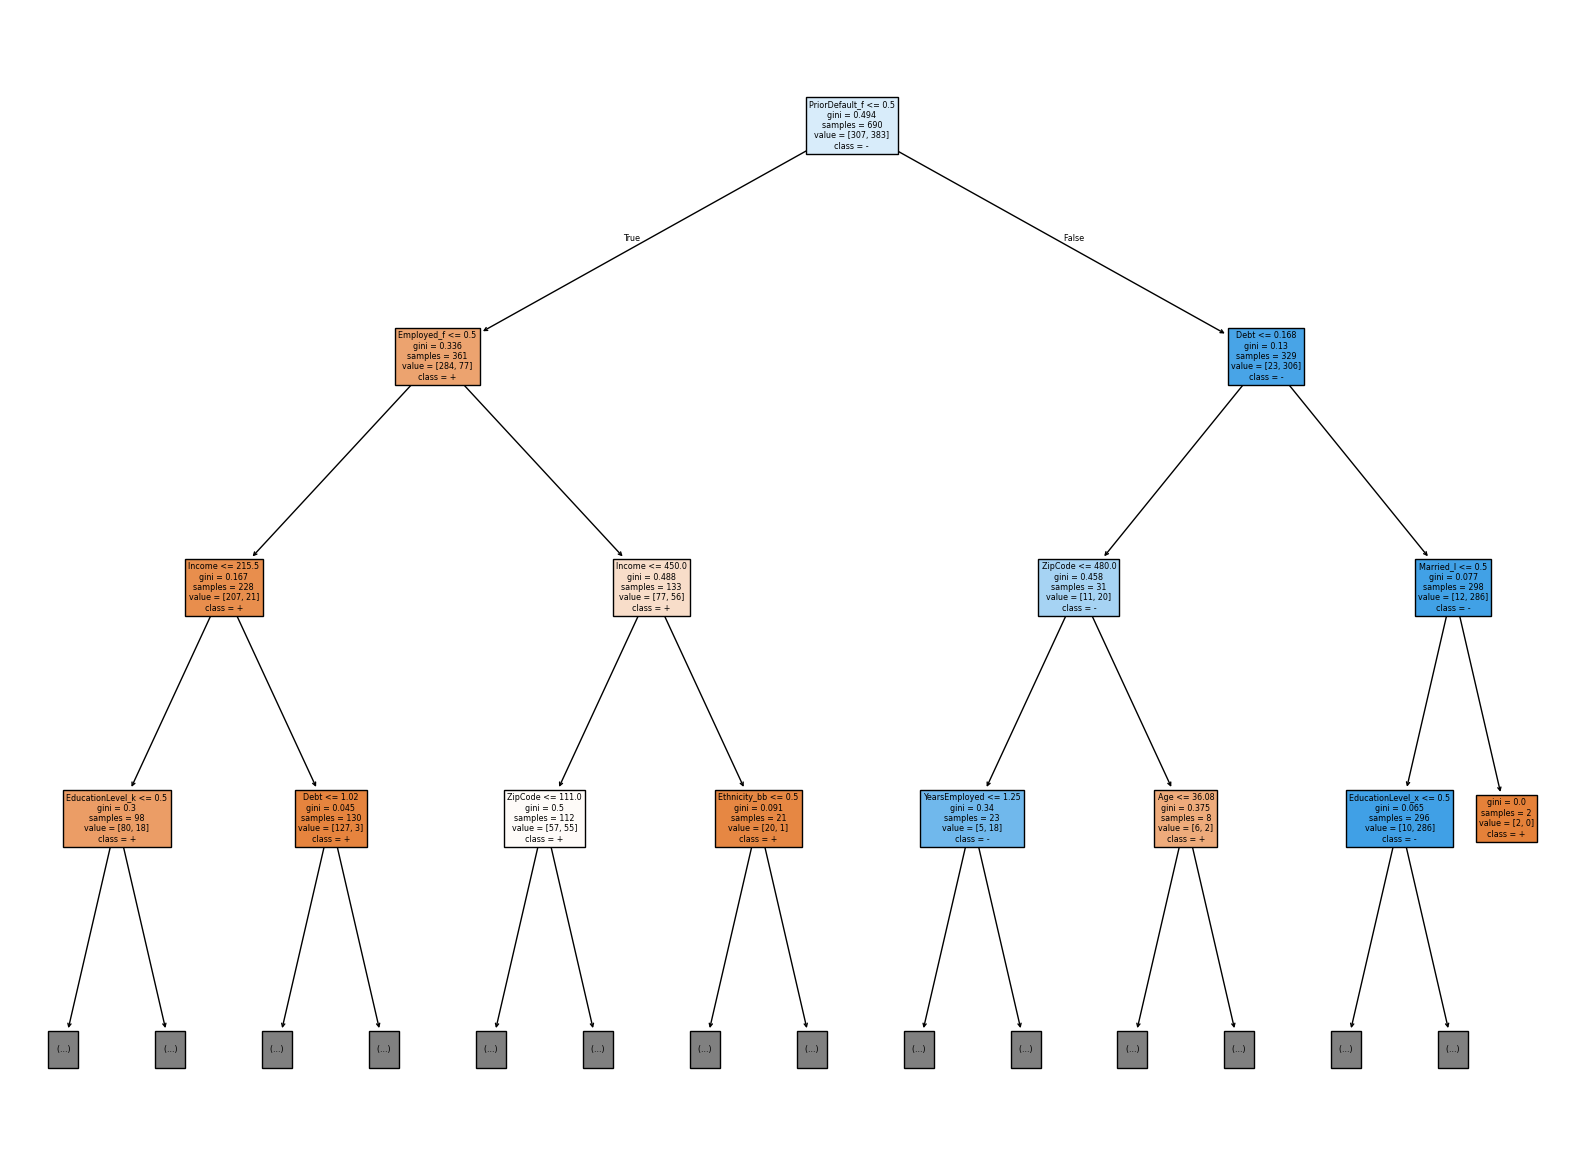

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
nirvana = tree.plot_tree(dt, filled=True, max_depth=3, feature_names=ohe_features.columns, class_names=dt.classes_)

In [30]:
# döntési fa mélységének korlátozása változtatása:
dt = tree.DecisionTreeClassifier(max_depth=3) # legfeljebb 3 mély fát építhet
dt.fit(ohe_features, classlabel)

DecisionTreeClassifier(max_depth=3)

## Kiértékelés

In [31]:
prediction = dt.predict(ohe_features)
prediction

array(['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '+', '+',
       '-', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '-', '+', '+',
       '+', '+', '+', '+', '+', '+', '-', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+',
       '-', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, classlabel)

0.863768115942029

Mindig hasonlítsuk a gépi tanulás eredményét [baseline](http://inf.u-szeged.hu/~rfarkas/ML20/baseline.html) döntésekhez!

A legegyszerűbb predikciós szabály az, hogy mindig a leggyakoribb címkét "predikáljuk".

In [33]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent") # tanító adatbázis leggyakoribb osztálya lesz mindig a predikció
dummy_clf.fit(features, classlabel) # ugyanazon a tanító adatbázison "tanítjuk"
baseline_prediction = dummy_clf.predict(features) # predikció a kiértékelő adatbázison
accuracy_score(baseline_prediction, classlabel)

0.5550724637681159

Örülünk, hogy szép nagy accuracyt értünk el fentebb !?

Nem. Még nem.

Eddig a tanító adatbázison értékeltük ki a modellt, azaz azon amin tanítottuk. Így sérül az, hogy ismeretlen, korábban nem látott példákon kell jól működnie a modellnek. Az igazi kiértékelést egy olyan (hold-out) halmazon kell végrehajtani ami nem része a tanító adatbázisnak, ezt **kiértékelő adatbázis**nak hívjuk (evaluation vagy test set).


## Predikció korábban nem látott példákra

[Osztályozók kiértékelését](http://inf.u-szeged.hu/~rfarkas/ML20/osztalyozas.html) a független kiértékelő adatbázison kell végezni.

In [34]:
from sklearn.model_selection import train_test_split
features_train, features_test, classlabel_train, classlabel_test = train_test_split(ohe_features, classlabel, test_size=0.25, random_state=42)

In [ ]:

features_test

In [35]:
# döntési fa tanítása
d = tree.DecisionTreeClassifier()
d.fit(features_train, classlabel_train)

DecisionTreeClassifier()

In [36]:
prediction = d.predict(features_test)

In [37]:

from sklearn.metrics import accuracy_score
accuracy_score(prediction, classlabel_test)

0.7687861271676301

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent") # tanító adatbázis leggyakoribb osztálya lesz mindig a predikció
dummy_clf.fit(features_train, classlabel_train) # ugyanazon a tanító adatbázison "tanítjuk"
baseline_prediction = dummy_clf.predict(features_test) # predikció a kiértékelő adatbázison
accuracy_score(baseline_prediction, classlabel_test)

0.5260115606936416

### Tanulási görbe

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import random
acc = {}
for n in range(20,len(features_train),30):
  d = tree.DecisionTreeClassifier(max_depth=3)
  res = []
  for i in range(300):
    randomlist = random.sample(range(0, len(classlabel_train)), n)
    d.fit(features_train.iloc[randomlist], classlabel_train.iloc[randomlist])
    prediction = d.predict(features_test)
    res.append( accuracy_score(prediction, classlabel_test) )
  print(n, pd.Series(res).mean())
  acc[n] = pd.Series(res).mean()

20 0.7473603082851638
50 0.782466281310212
80 0.7940269749518304
110 0.7988053949903661
140 0.8073217726396916
170 0.8067822736030829
200 0.8116377649325627
230 0.8161271676300578
260 0.8178805394990366
290 0.8188631984585741
320 0.8223699421965318
350 0.8215799614643544
380 0.8195375722543352
410 0.8202119460500964
440 0.8190366088631985
470 0.8194026974951831
500 0.8183815028901733


<Axes: >

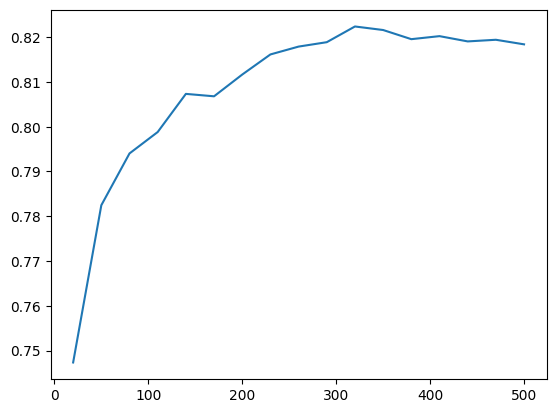

In [41]:
pd.Series(acc).plot()

## Osztályonkénti metrika

In [42]:
from sklearn.metrics import classification_report
print(classification_report(classlabel_test, prediction))

              precision    recall  f1-score   support

           +       0.79      0.90      0.84        82
           -       0.90      0.78      0.84        91

    accuracy                           0.84       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.85      0.84      0.84       173



## k-szoros keresztvalidáció

In [45]:
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
cross_val_score(dt, ohe_features, classlabel, cv=10)

array([0.49275362, 0.75362319, 0.94202899, 0.85507246, 0.89855072,
       0.88405797, 0.79710145, 0.55072464, 0.88405797, 0.85507246])

In [46]:
cross_val_score(dt, ohe_features, classlabel, cv=10).mean()

np.float64(0.7942028985507246)

In [47]:
from sklearn import metrics
cross_val_score(dt, ohe_features, classlabel, cv=10, scoring='f1_micro')

array([0.50724638, 0.7826087 , 0.89855072, 0.8115942 , 0.91304348,
       0.85507246, 0.76811594, 0.56521739, 0.89855072, 0.84057971])

# Gyakorló fealdat

Hajts végre egy osztályozási kísérletet a [survey adatbázison](https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/survey.csv), ahol azt akarjuk predikálni, hogy kézkulcsolásnál melyik kéz van felül (`Fold`), az összes többi oszlop, mint jellemző alapján!



In [87]:

features_train, features_test, classlabel_train, classlabel_test = train_test_split(ohe_features, classlabel, test_size=0.25, random_state=73)

accuracies = []

for depth in range(2,2+5):
  d_tree = tree.DecisionTreeClassifier(max_depth=depth)
  d_tree.fit(features_train, classlabel_train)

  pred = d_tree.predict(features_test)
  acc_temp = accuracy_score(pred, classlabel_test)
  accuracies.append(acc_temp)

  print(f"Mélység: {depth}, Accuracy: {acc_temp}")

print(f"\nÁtlagos accuracy: {sum(accuracies)/len(accuracies)}")



Mélység: 2, Accuracy: 0.8439306358381503
Mélység: 3, Accuracy: 0.8034682080924855
Mélység: 4, Accuracy: 0.8208092485549133
Mélység: 5, Accuracy: 0.861271676300578
Mélység: 6, Accuracy: 0.7803468208092486

Átlagos accuracy: 0.8219653179190752
